In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

### Simple Linear Regresssion

In [2]:
data = pd.read_csv("CO2.csv")

In [35]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [37]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [38]:
data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [39]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [40]:
data.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'], axis = 1, inplace = True)

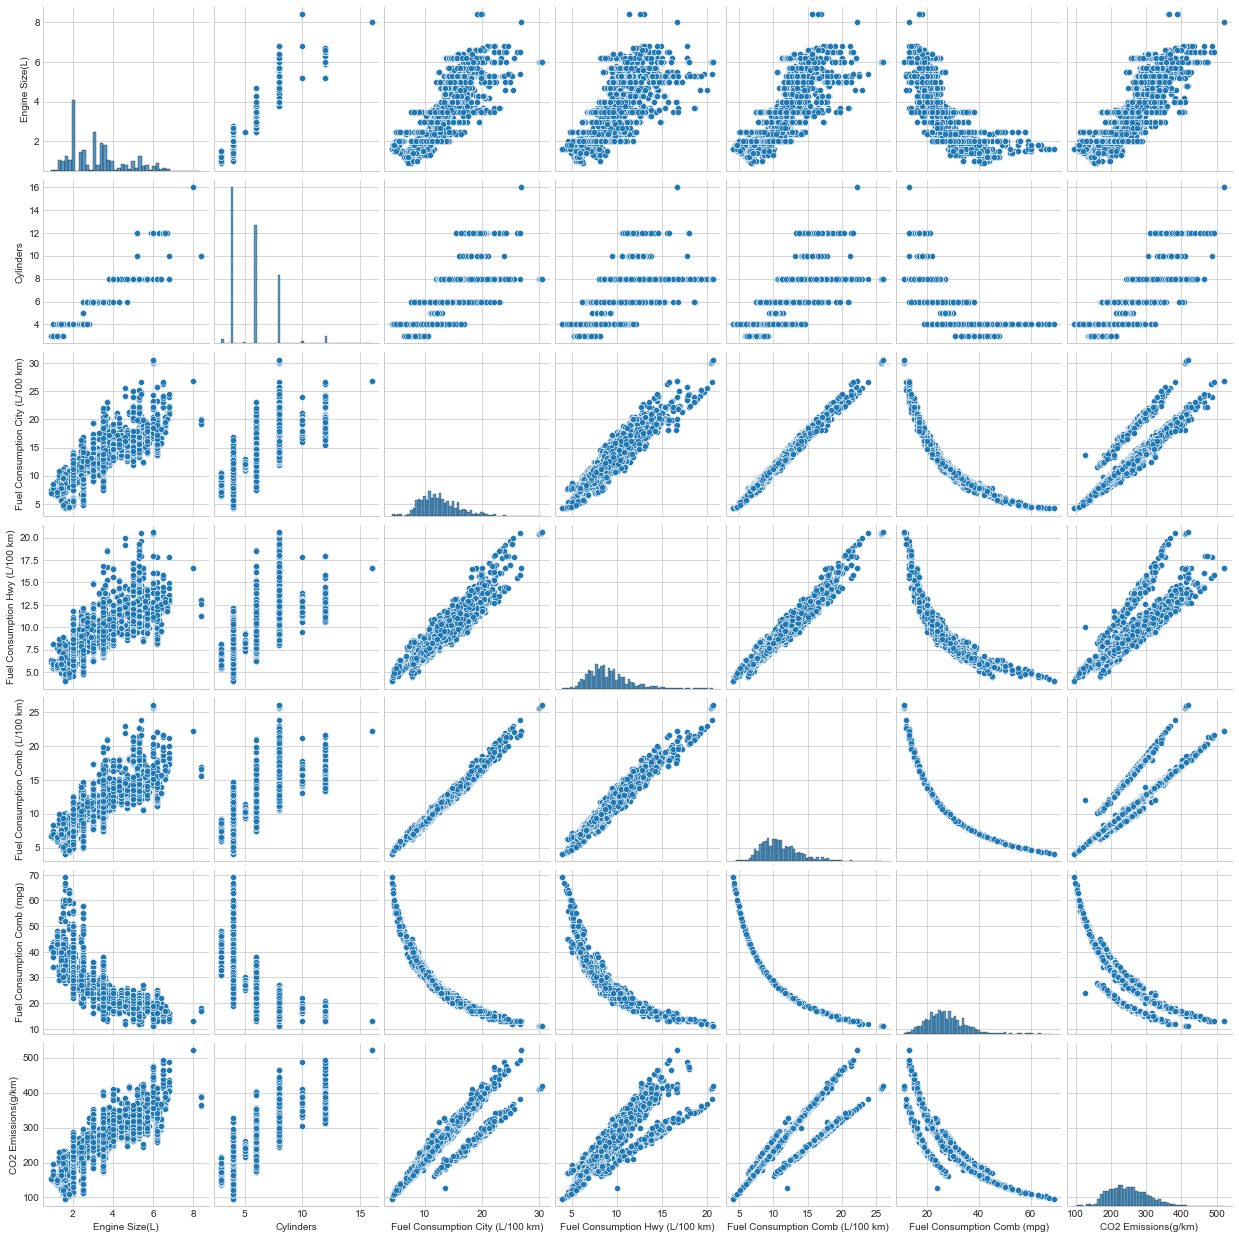

In [42]:
sns.pairplot(data)

Text(0.5, 0, 'Engine Size')

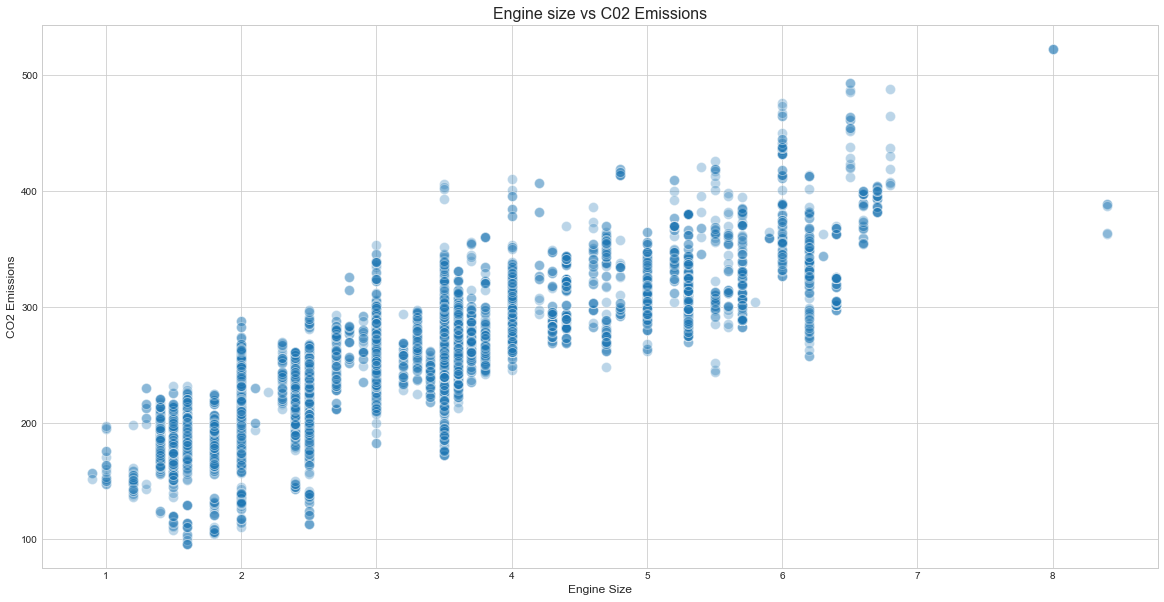

In [44]:
plt.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = data, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)

Text(0.5, 0, 'Fuel Consumption Comb (L/100 km)')

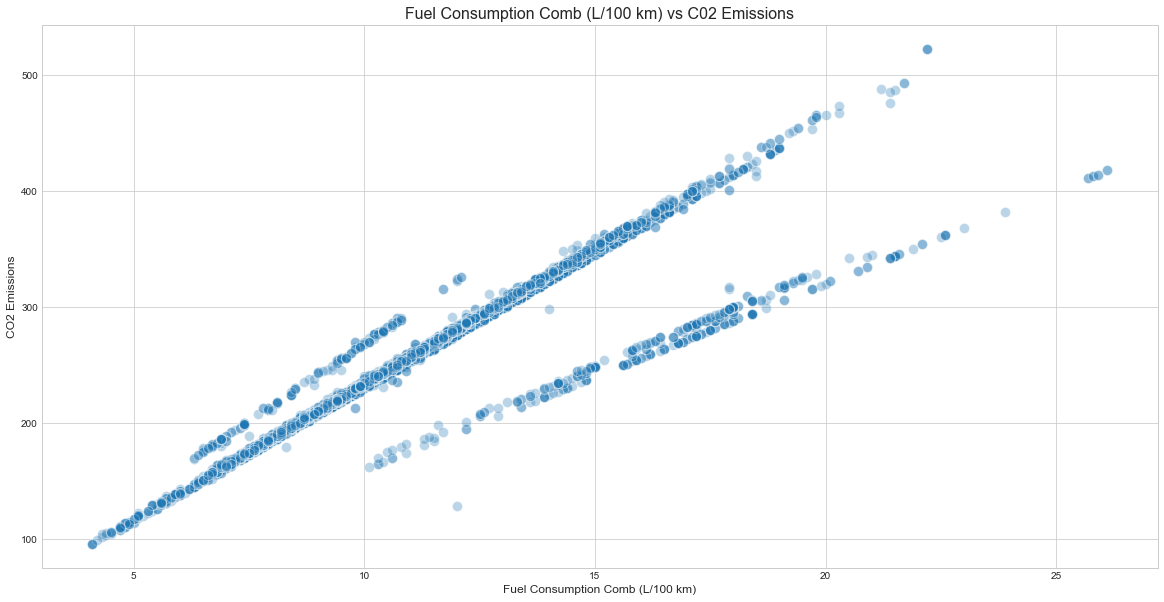

In [45]:
plt.scatter(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2 Emissions(g/km)', data = data, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Fuel Consumption Comb (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize = 12)

Text(0.5, 0, 'Fuel Consumption City (L/100 km)')

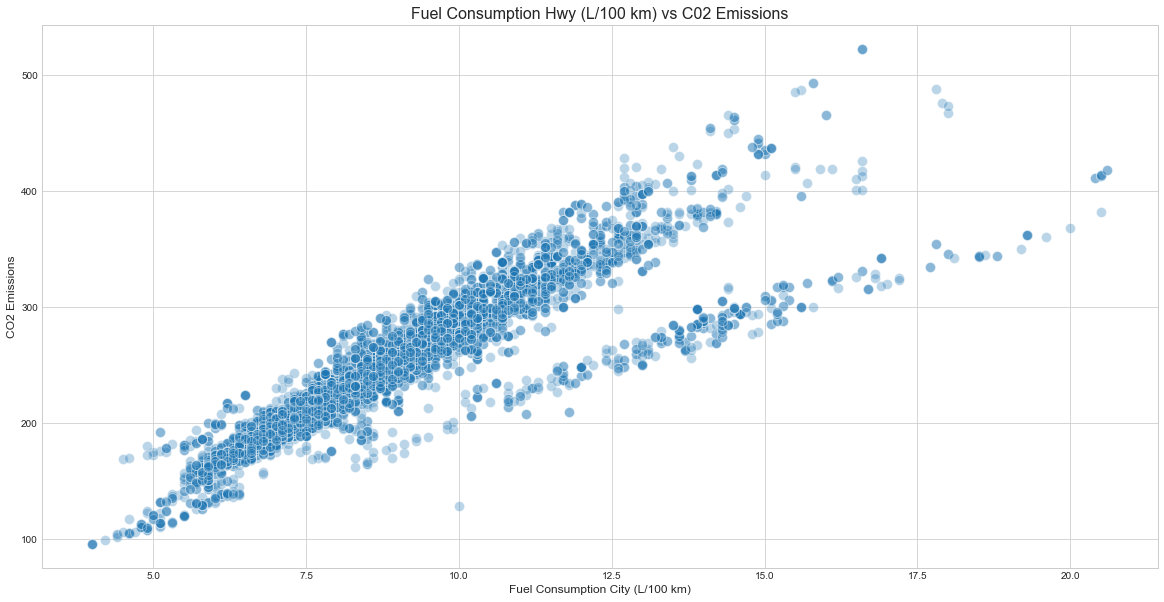

In [46]:
plt.scatter(x = 'Fuel Consumption Hwy (L/100 km)', y = 'CO2 Emissions(g/km)', data = data, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Fuel Consumption Hwy (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize = 12)

Text(0.5, 0, 'Fuel Consumption City (L/100 km)')

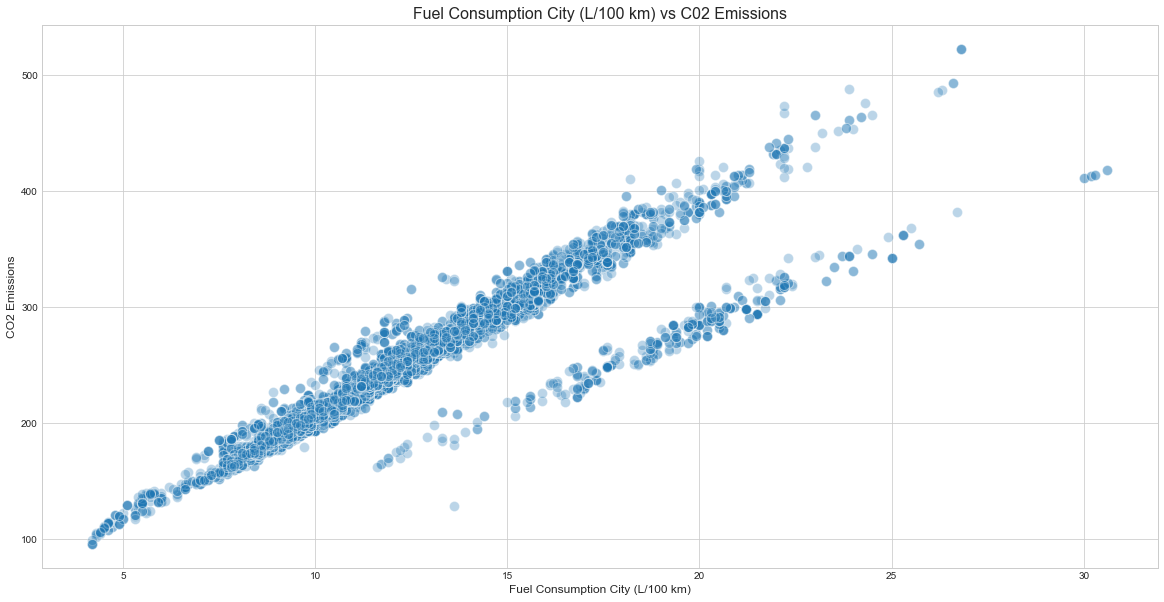

In [48]:
plt.scatter(x = 'Fuel Consumption City (L/100 km)', y = 'CO2 Emissions(g/km)', data = data, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Fuel Consumption City (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize = 12)

In [50]:
X = data[['Engine Size(L)']] # independent variable
y = data['CO2 Emissions(g/km)'] # dependent variable

#### (i)Using statsmodels

In [56]:
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(y, X) # Ordinary Least Squares 
slr_reg = slr_model.fit()

In [61]:
print(cl(slr_reg.summary(),attrs = ['bold']))

                                 OLS Regression Results                                 
Dep. Variable:     CO2 Emissions(g/km)   R-squared (uncentered):                   0.943
Model:                             OLS   Adj. R-squared (uncentered):              0.943
Method:                  Least Squares   F-statistic:                          1.232e+05
Date:                 Wed, 27 Sep 2023   Prob (F-statistic):                        0.00
Time:                         11:24:57   Log-Likelihood:                         -40860.
No. Observations:                 7385   AIC:                                  8.172e+04
Df Residuals:                     7384   BIC:                                  8.173e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

#### (ii)Using sklearn

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

Text(0.5, 0, 'Engine Size')

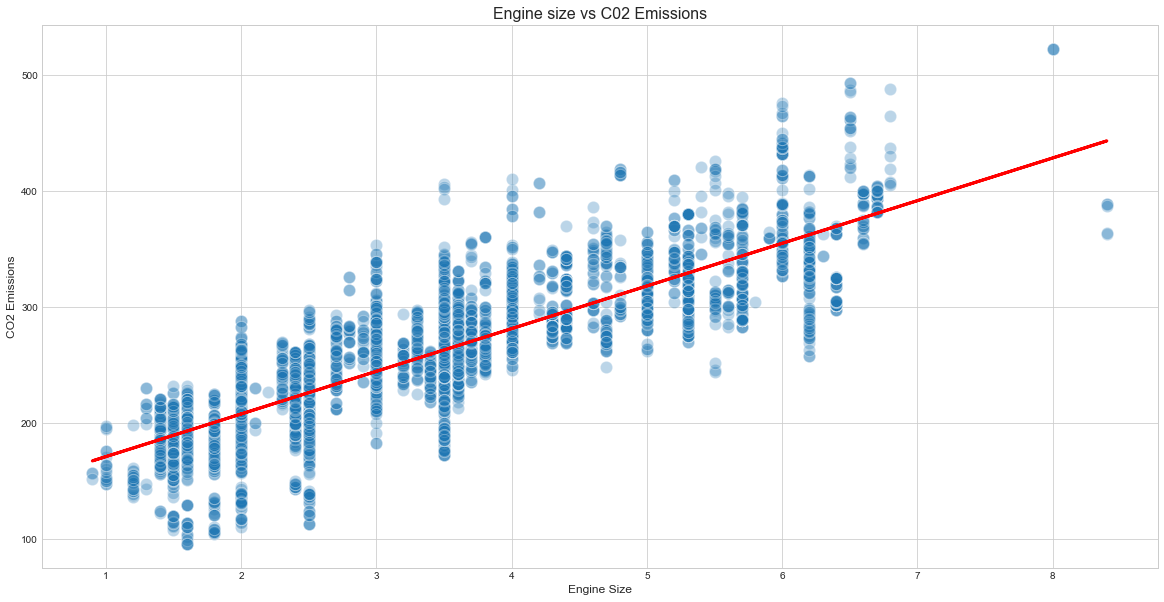

In [67]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sns.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = data, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(data['Engine Size(L)'], slr_slope*data['Engine Size(L)'] + slr_intercept, color = 'r', linewidth = 3)
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)

In [68]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : 0.7162770226132333


### Multiple Linear Regression

In [69]:
X1 = data[['Engine Size(L)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption City (L/100 km)']]
y = data['CO2 Emissions(g/km)'] # dependent variable

#### (i) Using statsmodels

In [70]:
sm_X1 = sm.add_constant(X1)

mlr_model = sm.OLS(y, sm_X1)
mlr_reg = mlr_model.fit()

In [72]:
print(cl(mlr_reg.summary(), attrs = ['bold']))

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                 1.276e+04
Date:                 Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                         11:38:04   Log-Likelihood:                -32890.
No. Observations:                 7385   AIC:                         6.579e+04
Df Residuals:                     7380   BIC:                         6.582e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

#### (ii) Using sklearn

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

In [74]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : 0.8655946234480003


/Users/swastika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/swastika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


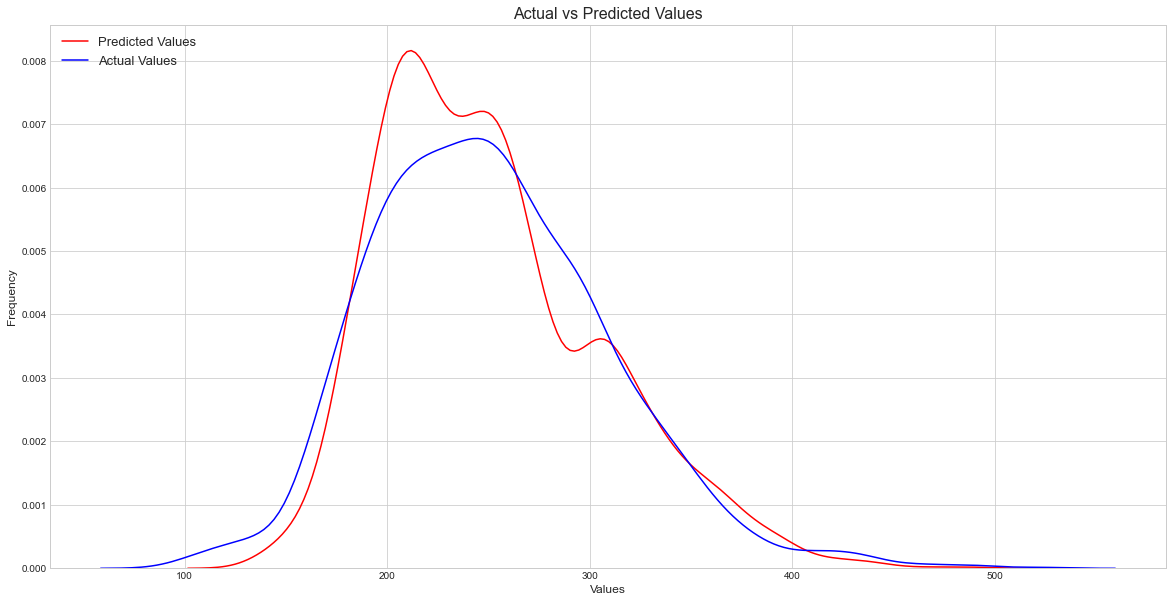

In [78]:
sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

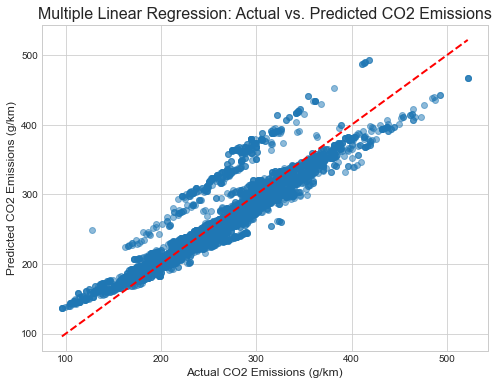

In [87]:
X1 = data[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']]
y = data['CO2 Emissions(g/km)']

X1 = sm.add_constant(X1)
yhat = mlr_reg.predict(X1)
plt.figure(figsize=(8, 6))
plt.scatter(y, yhat, alpha=0.5)
plt.title('Multiple Linear Regression: Actual vs. Predicted CO2 Emissions', fontsize=16)
plt.xlabel('Actual CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Predicted CO2 Emissions (g/km)', fontsize=12)
plt.grid(True)

plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2)

plt.show()